In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe
import statsmodels.api as sm

In [3]:
pbi = pd.read_stata('/home/alvin/Desktop/Python/pbi.dta',convert_dates=True, index_col='Year')

In [4]:
# fix the index to date 
date = pd.date_range(start='01/01/1950', end='01/01/2020', freq='Y')
pbi.index = date

In [5]:
pbi = pbi.drop(['dpbi','res','cre','d1','d2','cre1','cre2','crefin'], axis=1)

In [6]:
pbi['log_pbi'] = np.log(pbi['pbi'])

In [7]:
pbi['log_pbi_diff'] = pbi.log_pbi - pbi.log_pbi.shift(periods=1)

In [8]:
pbi

,pbi,lpbi,dlpbi,log_pbi,log_pbi_diff
1950-12-31,40920.0000,10.619374,NaN,10.619374,NaN
1951-12-31,44711.0000,10.707974,0.088600,10.707975,0.088601
1952-12-31,47347.0000,10.765259,0.057284,10.765259,0.057284
1953-12-31,50085.0000,10.821477,0.056218,10.821477,0.056218
1954-12-31,52762.0000,10.873547,0.052070,10.873547,0.052070
...,...,...,...,...,...
2015-12-31,482676.3782,13.087102,0.032211,13.087102,0.032211
2016-12-31,502224.7398,13.126803,0.039701,13.126803,0.039701
2017-12-31,514655.0361,13.151252,0.024448,13.151252,0.024449
2018-12-31,535082.8791,13.190177,0.038925,13.190177,0.038925


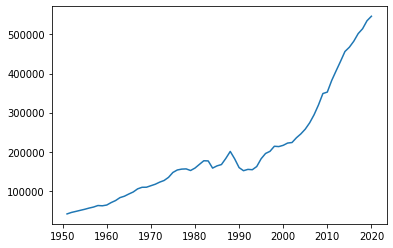

In [9]:
plt.plot(pbi.pbi);


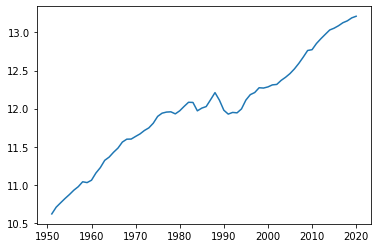

In [10]:
plt.plot(pbi.log_pbi);


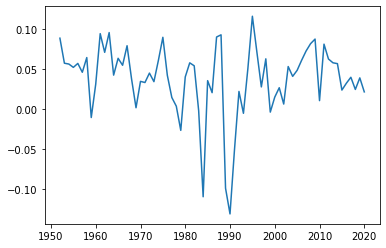

In [11]:
plt.plot(pbi.log_pbi_diff);


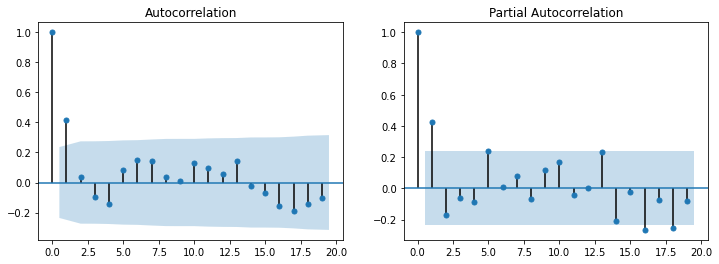

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

# ACF chart
fig = sm.graphics.tsa.plot_acf(pbi.log_pbi_diff.dropna(), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(pbi.log_pbi_diff.dropna(), ax=ax2)
# ignorar el primero

In [13]:
from statsmodels.tsa.arima_model import ARMA

In [16]:
mod = ARMA(pbi.log_pbi_diff.dropna(), order=(1,0))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:           log_pbi_diff   No. Observations:                   69
Model:                     ARMA(1, 0)   Log Likelihood                 123.105
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sun, 31 May 2020   AIC                           -240.211
Time:                        09:09:21   BIC                           -233.509
Sample:                    12-31-1951   HQIC                          -237.552
                         - 12-31-2019                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0379      0.008      4.549      0.000       0.022       0.054
ar.L1.log_pbi_diff     0.4200      0.109      3.848      0.000       0.206       0.634
                    

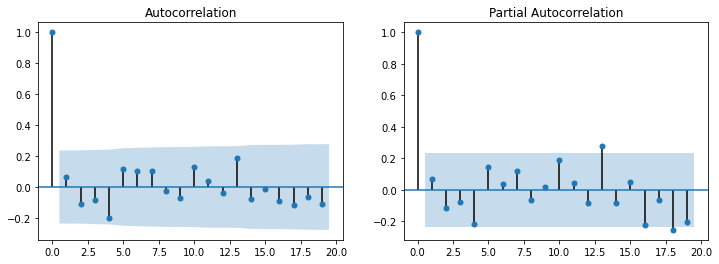

In [17]:
# Gráfica de los residuos
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

# ACF chart
fig = sm.graphics.tsa.plot_acf(result.resid.dropna(), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(result.resid.dropna(), ax=ax2)
# ignorar el primero

In [60]:
# le aplica al PBI original no al de diferencias





In [64]:
a = sm.tsa.stattools.adfuller(pbi.pbi.dropna(), regression='c')
print('ADF Statistic: %f' % a[0])
print('p-value: %f' % a[0])
print('Critical Values:')
for key, value in a[4].items():
    print('\t%s: %.3f' % (key,value))
    
if a[0] < a[4]['5%']:
    print('Reject Ho - Time series is Stationary')
else:
    print('Failed to Reject Ho - Times series Non-Stationary')
    
# avergiguar cómo saber cuándo quitar la tendencia y la constante a la prueba

ADF Statistic: 2.366505
p-value: 2.366505
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
Failed to Reject Ho - Times series Non-Stationary


In [68]:
a = sm.tsa.stattools.adfuller(pbi.pbi.dropna(), regression='ct')
print('ADF Statistic: %f' % a[0])
print('p-value: %f' % a[0])
print('Critical Values:')
for key, value in a[4].items():
    print('\t%s: %.3f' % (key,value))
    
if a[0] < a[4]['5%']:
    print('Reject Ho - Time series is Stationary')
else:
    print('Failed to Reject Ho - Times series Non-Stationary')

ADF Statistic: 0.357788
p-value: 0.357788
Critical Values:
	1%: -4.098
	5%: -3.477
	10%: -3.166
Failed to Reject Ho - Times series Non-Stationary


In [66]:
a = sm.tsa.stattools.adfuller(pbi.pbi.dropna(), regression='nc')
print('ADF Statistic: %f' % a[0])
print('p-value: %f' % a[0])
print('Critical Values:')
for key, value in a[4].items():
    print('\t%s: %.3f' % (key,value))
    
if a[0] < a[4]['5%']:
    print('Reject Ho - Time series is Stationary')
else:
    print('Failed to Reject Ho - Times series Non-Stationary')
    
# avergiguar cómo saber cuándo quitar la tendencia y la constante a la prueba

ADF Statistic: 3.628540
p-value: 3.628540
Critical Values:
	1%: -2.599
	5%: -1.946
	10%: -1.613
Failed to Reject Ho - Times series Non-Stationary


In [69]:
a = sm.tsa.stattools.adfuller(pbi.log_pbi_diff.dropna(), regression='ctt')
print('ADF Statistic: %f' % a[0])
print('p-value: %f' % a[0])
print('Critical Values:')
for key, value in a[4].items():
    print('\t%s: %.3f' % (key,value))
    
if a[0] < a[4]['5%']:
    print('Reject Ho - Time series is Stationary')
else:
    print('Failed to Reject Ho - Times series Non-Stationary')
    
# avergiguar cómo saber cuándo quitar la tendencia y la constante a la prueba

ADF Statistic: -5.433338
p-value: -5.433338
Critical Values:
	1%: -4.553
	5%: -3.924
	10%: -3.609
Reject Ho - Time series is Stationary
